In [3]:
#  1.Importing Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn


import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [4]:
#  2.Data Preprocessing

# loading the dataset
df=pd.read_csv('English_profanity_words.csv')

In [5]:
# Showing the first five rows of the dataset

df.head()

,is_offensive,text
0,0,Then go to the village pump and suggest they c...
1,1,ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...
2,1,Dis hoe wasnt dis violent on Lottery Ticket 😂😂
3,0,It is better for Atabay not helping the banned...
4,0,"""is in CamelCase. """"SiCKO"""" is not CamelCase,..."


In [6]:
# Showing the dataset shape

df.shape

(184354, 2)

In [7]:
# Showing the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184354 entries, 0 to 184353
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   is_offensive  184354 non-null  int64 
 1   text          184350 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


In [8]:
# Showing the dataset null values

df.isnull().sum()

is_offensive    0
text            4
dtype: int64

In [9]:
# Showing the dataset duplicate values

df.duplicated().sum()

110

In [10]:
# Dropping the dataset duplicate values

df.drop_duplicates(inplace=True)

In [11]:
# Showing the dataset shape again

df.shape

(184244, 2)

In [12]:
# Showing the dataset null values again

df.isnull().sum()

is_offensive    0
text            1
dtype: int64

In [13]:
# Dropping the dataset null values

df.dropna(inplace=True)

In [14]:
# Dataset is cleaned now

df.isnull().sum()

is_offensive    0
text            0
dtype: int64

<Axes: xlabel='is_offensive', ylabel='count'>

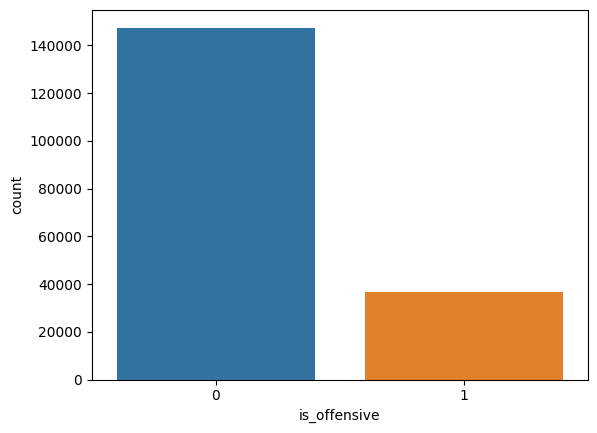

In [15]:
#  3.Exploratory Data Analysis

# a) Distribution of the Labeled Column

sn.countplot(x=df['is_offensive'])

In [16]:
# b) Visualizing the Offensive and Non Offensive words with the help of WordCloud

from wordcloud import WordCloud

In [17]:
# i) Offensive Text

offensive_text = df[df['is_offensive'] == 1]['text']

offensive_text

1         ANTI GREEK NATIONALIS -WIKIPEDIA \n\nHi Alexik...
2            Dis hoe wasnt dis violent on Lottery Ticket 😂😂
8               Yo bag Gucci but you still ugly hoe shut up
21         I love my family, but I wouldn't even need wa...
23        "\n\n A kitten for you! \n\ndose this look lik...
                                ...                        
184325             Ima pull up eat on that pussy and dip...
184331          Going to the creek with my bitches tomorrow
184337    @_SiNCERE18 ; LMAO! . hoes extra sensitive via...
184348    "\nLMAO, that's basically saying ""wahhh he ca...
184350     Regrets are for pussies. Shit happens, deal w...
Name: text, Length: 36786, dtype: object

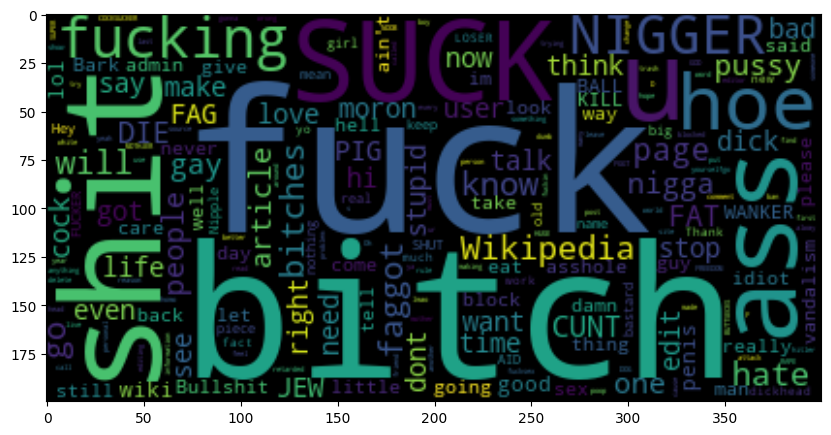

In [18]:
word_cloud = WordCloud(collocations=False, background_color='black').generate(" ".join(offensive_text))

# Display the generated word cloud:
plt.figure(figsize=(10, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

In [19]:
# ii) Non offensive text

non_offensive_text=df[df['is_offensive']==0]['text']

non_offensive_text

0         Then go to the village pump and suggest they c...
3         It is better for Atabay not helping the banned...
4         "is in CamelCase.  ""SiCKO"" is not CamelCase,...
5         and  \n\nHi!  has Requested Arbitration with m...
6         Nonetheless lactose has a hemiacetal group whi...
                                ...                        
184347    Discussion is a two-way street.  Where's the W...
184349                     Template:uw-vandalism2 >  | Talk
184351    Could this possibly be the origin of popular g...
184352    "Your article submission has been declined, an...
184353    .\nEditors can not move articles except inside...
Name: text, Length: 147457, dtype: object

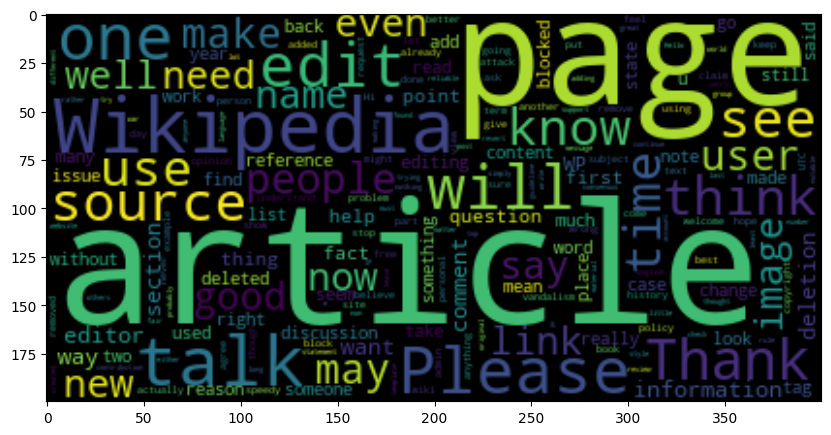

In [20]:
wordcloud1=WordCloud(collocations=False, background_color='black').generate(" ".join(non_offensive_text))


# Display the generated word cloud:
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.show()

In [21]:
# 4) Data Cleaning Process

# Download the libraries

nltk.download("stopwords")
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\keert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Creating a function for cleaning the text

def clean(text):
    text = str(text).lower()
    text = re.sub("\[.*?\]", "", text)
    text = re.sub("https?://\S+", "",text)
    text = re.sub("<.*?>+","",text)
    text = re.sub("[%s]" % re.escape(string.punctuation),"",text)
    text = re.sub("\n","",text)
    text = [word for word in text.split(" ") if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(" ")]
    text = " ".join(text)
    return text

In [23]:
# Applying the function to the original text

df['text']=df['text'].apply(clean)

In [24]:
df.head()

,is_offensive,text
0,0,go villag pump suggest chang languag rfc set
1,1,anti greek nationali wikipedia hi alexikouay v...
2,1,dis hoe wasnt dis violent lotteri ticket 😂😂
3,0,better atabay help ban vandal push pov
4,0,camelcas sicko camelcas camelcas rule r baley...


In [25]:
# 4) Train Test Split

X=df['text']
Y=df['is_offensive']

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=101)

print(X.shape,X_train.shape,X_test.shape)

(184243,) (147394,) (36849,)


In [27]:
# 5) Converting the text into the vectors using Tf-idf Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()
X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

In [28]:
# 6) Model Training

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [29]:
# A) Logistic Regression

lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [30]:
# i) Train Accuracy

y_pred=lr.predict(X_test)
test_acc=accuracy_score(Y_test, y_pred)

test_acc

0.9551412521371001

In [31]:
# ii) Test Accuracy

y1_pred=lr.predict(X_train)
train_acc=accuracy_score(Y_train, y1_pred)

train_acc

0.9596794984870484

In [32]:
# iii) Classification Report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     29393
           1       0.96      0.82      0.88      7456

    accuracy                           0.96     36849
   macro avg       0.96      0.90      0.93     36849
weighted avg       0.96      0.96      0.95     36849



<Axes: >

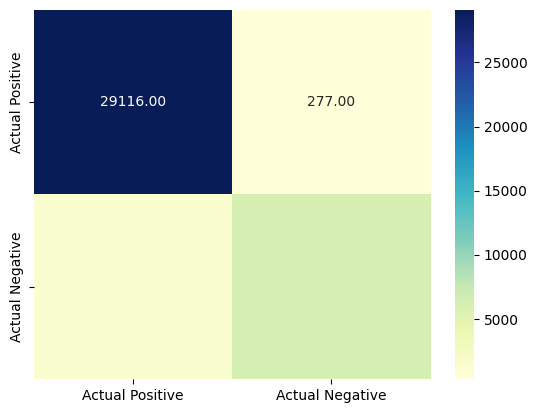

In [33]:
# iv) Confusion Matrix

cm=confusion_matrix(Y_test, y_pred)
cm_matrix=pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], index=['Predicted Positive', 'Predicted Negative'])
sn.heatmap(cm_matrix, annot=True, cmap='YlGnBu', fmt='.2f')

In [34]:
# B) Naive Bayes

# i) Train Accuracy

nv=MultinomialNB()
nv.fit(X_train,Y_train)

MultinomialNB()

In [35]:
# ii) Test Accuracy

y_pred=nv.predict(X_test)
test_acc=accuracy_score(Y_test, y_pred)

test_acc

0.9107438465087248

In [36]:
y1_pred=nv.predict(X_train)
train_acc=accuracy_score(Y_train, y1_pred)

train_acc

0.9238842829423178

In [37]:
# iii) Classification Report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     29393
           1       0.97      0.57      0.72      7456

    accuracy                           0.91     36849
   macro avg       0.94      0.79      0.83     36849
weighted avg       0.92      0.91      0.90     36849



<Axes: >

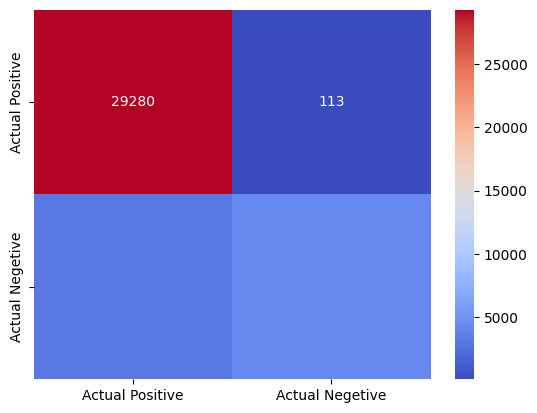

In [38]:
# iv) Confusion Matrix

cf=confusion_matrix(Y_test, y_pred)

cf_matrix=pd.DataFrame(data=cf, columns=['Actual Positive', 'Actual Negetive'], index=['Predicted Positive', 'Predicted Negative'])
sn.heatmap(cf_matrix, annot=True, cmap='coolwarm', fmt='g')

In [39]:
# a) For Hate Speech

text = ['Fuck you Bitch']
tx = tfidf.transform(text)
tx = lr.predict(tx)

if tx[0]==1:
    print('Hate Speech')
else:
    print('Normal Speech')

Hate Speech


In [40]:
# b) For Normal Spech

text = ['Hi are You?!']
tx = tfidf.transform(text)
tx = lr.predict(tx)

if tx[0]==1:
    print('Hate Speech')
else:
    print('Normal Speech')

Normal Speech


In [41]:
# 8) Saving the Model

import os
import joblib

# Create the directory if it doesn't exist
os.makedirs('Project/Models', exist_ok=True)

# Saving the models in the directory
joblib.dump(lr, 'Project/Models/logistic_speech_model.pkl')
joblib.dump(tfidf, 'Project/Models/tfidf_speech.pkl')


['Project/Models/tfidf_speech.pkl']

In [1]:
## from the above analysis it is proven that the logistic regression model is the one which gives high accuracy


In [3]:
# Precision = True positive / (True Positive + False Positive)

# Recall = True Positive / (True Positive + False Negative)

# F1-Score =  (2 * Precision * Recall) / (Precision + Recall)

# Accuracy = (TP + TN) / (TP + TN + FP + FN)